## Setup

In [5]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import seaborn as sns

In [6]:
from pathlib import Path

Images_path=Path() / "images" /"svm"
Images_path.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=Images_path/f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)


## Soft Margin Classification

In [7]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=(iris.target==2) #iris virginica

svm_clf=make_pipeline(StandardScaler(),LinearSVC(C=1,dual=True,random_state=42))


In [8]:
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=True, random_state=42))])

In [9]:
X_new=[[5.5,1.7],[5.0,1.5]]

svm_clf.predict(X_new)

array([ True, False])

The first plant is classified as Iris Virginica and the second is not

In [10]:
svm_clf.decision_function(X_new) #scores SVM used for prediction

array([ 0.66163411, -0.22036063])

### Polynomial Features and Linear SVM

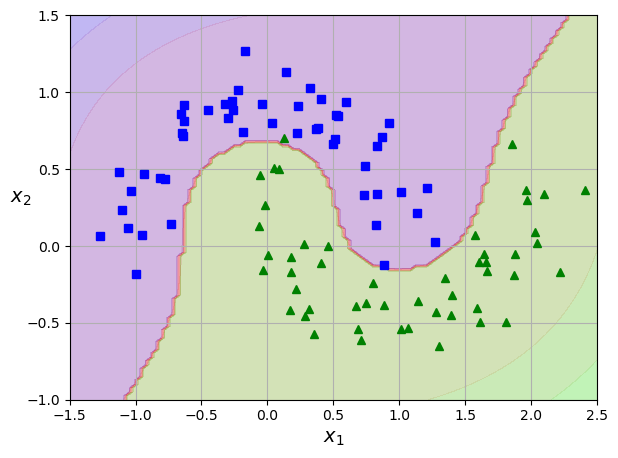

In [48]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #100 values b/w xmin and xmax
    x1s = np.linspace(axes[2], axes[3], 100) #100 values b/w ymin and ymax
    x0, x1 = np.meshgrid(x0s, x1s) #creates a grid of x and y values.x0 and x1 are 2D arrays that represent all combinations of x0s and x1
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape) #gets the predicted class labels for each point in the grid.
    y_decision = clf.decision_function(X).reshape(x0.shape) # decision function (distance to the decision boundary) for each point in the grid.
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

- Adding high degree polynomialFeatures creates a huge number of features, making the model too slow
- This makes the computation extremely intensive and impractical

### Polynomial Kernel & SVC

In [49]:
from sklearn.svm import SVC
poly_kernel_svm_clf=make_pipeline(StandardScaler(),SVC(kernel="poly",degree=3, coef0=1,C=5))
poly_kernel_svm_clf.fit(X, y)                                

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

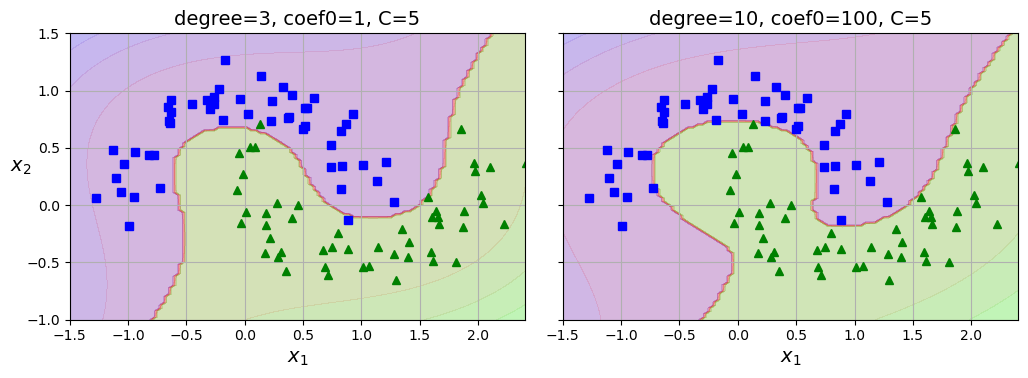

In [51]:
poly_100kernel_svm_clf=make_pipeline(StandardScaler(),SVC(kernel='poly',degree=10,coef0=100,C=5))
poly_100kernel_svm_clf.fit(X,y)
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")


plt.sca(axes[1])
plot_predictions(poly_100kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### Gaussian RBF Kernel

In [59]:
rbf_kernel_svm_clf1 = make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf1.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

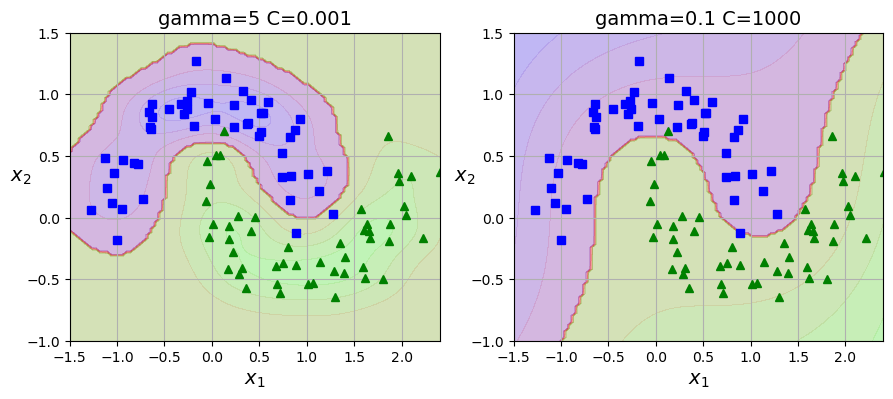

In [69]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 4))

plt.sca(axes[0])
plot_predictions(rbf_kernel_svm_clf1, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=5 C=0.001")


rbf_kernel_svm_clf2 = make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=0.1, C=1000))
rbf_kernel_svm_clf2.fit(X, y)

plt.sca(axes[1])
plot_predictions(rbf_kernel_svm_clf2, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=0.1 C=1000")
plt.show()

-  Increasing gamma makes the bell-shaped curve narrower,each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances.
-  a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother

- γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce γ
- if it is underfitting, you should increase γ (similar to the C hyperparameter).

## SVM Regression

In [73]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X=2* np.random.rand(50,1)
y=4 + 3*X[:,0] + np.random.rand(50)

svm_reg=make_pipeline(StandardScaler(),LinearSVR(epsilon=0.5,dual=True,random_state=42))
svm_reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, epsilon=0.5, random_state=42))])

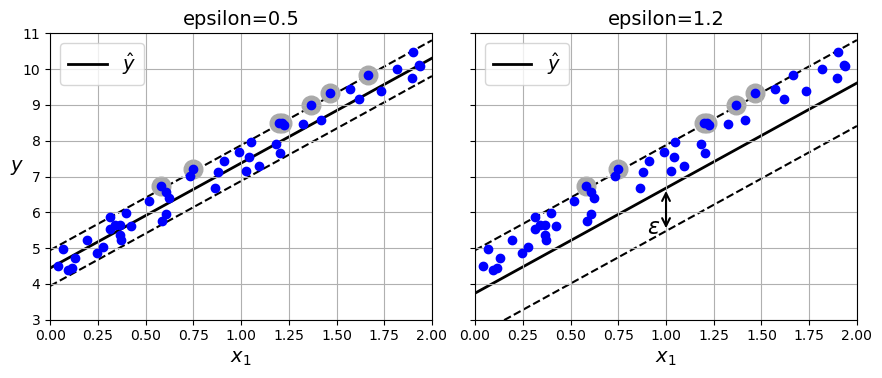

In [74]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)
    
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)

svm_reg2 = make_pipeline(StandardScaler(),
                         LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
save_fig("svm_regression_plot")
plt.show()

# Exercises

### (09) Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [77]:
from sklearn.datasets import load_iris

X,y=load_iris(return_X_y=True, as_frame=True)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [80]:
X=X.drop(["sepal length (cm)","sepal width (cm)"],axis=1)

In [81]:
setosa_or_versicolor=(y==0) | (y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

In [90]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C=5
alpha=0.05
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

lin_clf=LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled,y)
svc_clf=SVC(kernel="linear",C=C).fit(X_scaled,y)
sgd_clf=SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled,y)


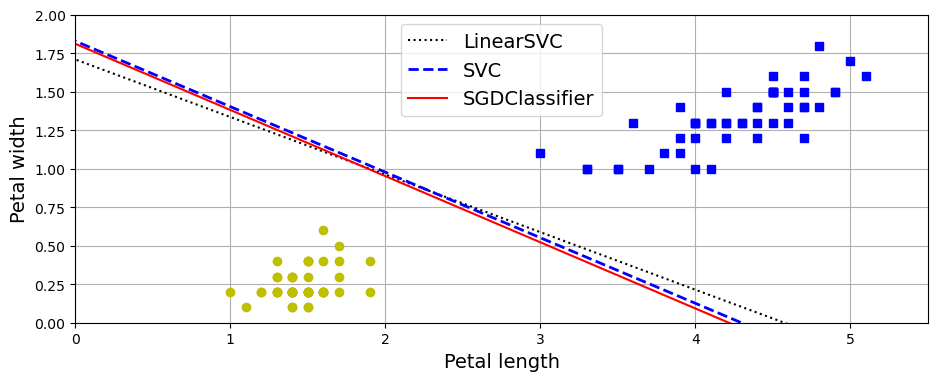

In [110]:


def compute_decision_boundary(model):
    w= -model.coef_[0,0] / model.coef_[0,1] #calculate slope
    b=-model.intercept_[0] / model.coef_[0,1] #slope
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]]) #reverse the feature scaling

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X.iloc[:,0][y==1], X.iloc[:,1][y==1],'bs')
plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

### (10) Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?

In [111]:
## Linear SVM classifier automatically uses OVR strategy, so the solution is pretty straightforward.
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)

In [114]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(dual=True, random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=True, random_state=42))])

In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(lin_clf, X_train, y_train)

array([1.        , 0.96296296, 0.96296296, 0.96153846, 1.        ])

In [117]:
cross_val_score(lin_clf, X_train, y_train).mean()

0.9774928774928775